<a href="https://colab.research.google.com/github/CRinHer/Phys-Cog-CISI-Group/blob/main/notebooks/neural_mi_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will contain the results of each tutorial from the NeuralMI webpage.

In [1]:
import numpy
print(numpy.__version__)
print(numpy.__file__)

1.26.4
c:\Users\Rinta\anaconda3\Lib\site-packages\numpy\__init__.py


In [2]:
import sys
print(sys.executable)

c:\Users\Rinta\anaconda3\python.exe


In [3]:
!pip install git+https://github.com/eslam-abdelaleem/NeuralMI.git

  Cloning https://github.com/eslam-abdelaleem/NeuralMI.git to c:\users\rinta\appdata\local\temp\pip-req-build-otp7mj87
  Resolved https://github.com/eslam-abdelaleem/NeuralMI.git to commit 107d9ed281c1e9a3f456a184c7a38004d07467e9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/eslam-abdelaleem/NeuralMI.git 'C:\Users\Rinta\AppData\Local\Temp\pip-req-build-otp7mj87'


In [1]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

PyTorch version: 2.6.0+cu124
CUDA available: True
GPU name: NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
import torch, time

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Warm-up
for _ in range(3):
    torch.matmul(torch.randn(2048, 2048, device=device),
                 torch.randn(2048, 2048, device=device))

torch.cuda.synchronize()

# GPU benchmark
start = time.time()
for _ in range(100):
    a = torch.randn(2048, 2048, device=device)
    b = torch.randn(2048, 2048, device=device)
    c = torch.matmul(a, b)
torch.cuda.synchronize()
print(f"GPU batch run: {time.time() - start:.4f} seconds")

# CPU benchmark
start = time.time()
for _ in range(100):
    a_cpu = torch.randn(2048, 2048)
    b_cpu = torch.randn(2048, 2048)
    c_cpu = torch.matmul(a_cpu, b_cpu)
print(f"CPU batch run: {time.time() - start:.4f} seconds")



Using device: cuda
GPU batch run: 0.2982 seconds
CPU batch run: 11.1412 seconds


In [6]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())
print(torch.backends.cudnn.is_available())
print(torch.version.cuda)


NVIDIA GeForce RTX 3060 Laptop GPU
True
True
12.4


# Tutorial 1: A First MI Estimate

In [3]:
import numpy as np
import neural_mi as nmi

# --- Dataset Parameters ---
n_samples = 5000
dim = 5
ground_truth_mi_bits = 2.0

# --- Generate Raw 2D Data ---
# This creates data of shape (n_samples, dim).
x_raw, y_raw = nmi.datasets.generate_correlated_gaussians(
    n_samples=n_samples,
    dim=dim,
    mi=ground_truth_mi_bits
)

# Transpose to the expected (n_channels, n_timepoints) format for the processor
x_raw_transposed = x_raw.T
y_raw_transposed = y_raw.T

print(f"Transposed X data shape: {x_raw_transposed.shape}")
print(f"Transposed Y data shape: {y_raw_transposed.shape}")

# The processor will treat each of the 5000 columns as an independent sample.
processor_params = {'window_size': 1}

# Basic model and training parameters
base_params = {
    'n_epochs': 50, 'learning_rate': 5e-4, 'batch_size': 128,
    'patience': 10, 'embedding_dim': 16, 'hidden_dim': 64, 'n_layers': 2
}

: 

In [ ]:
results = nmi.run(
    x_data=x_raw_transposed, y_data=y_raw_transposed,
    mode='estimate',
    processor_type='continuous',
    processor_params=processor_params,
    base_params=base_params,
    output_units='bits', # Specify the output units
    random_seed=42       # For reproducibility
)

estimated_mi_bits = results.mi_estimate

print(f"\n--- Results ---")
print(f"Ground Truth MI:  {ground_truth_mi_bits:.3f} bits")
print(f"Estimated MI:     {estimated_mi_bits:.3f} bits")
print(f"Estimation Error: {abs(estimated_mi_bits - ground_truth_mi_bits):.3f} bits")

# Tutorial 2: A Visual Guide to Neuroscience Data Processing

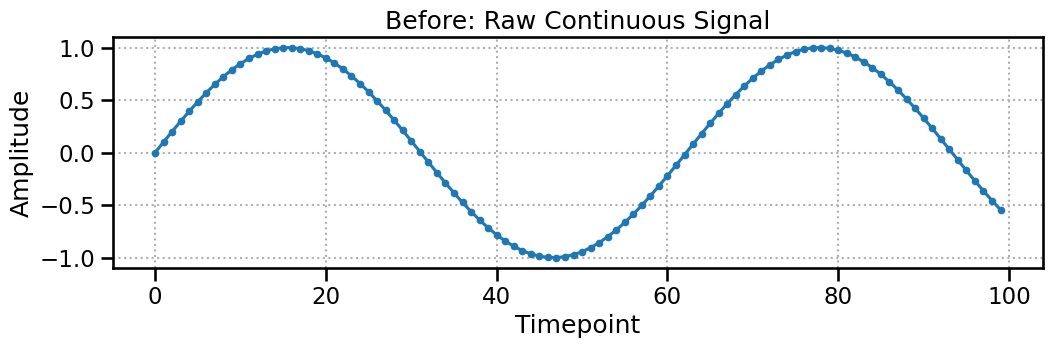

Raw data shape: (1, 100)


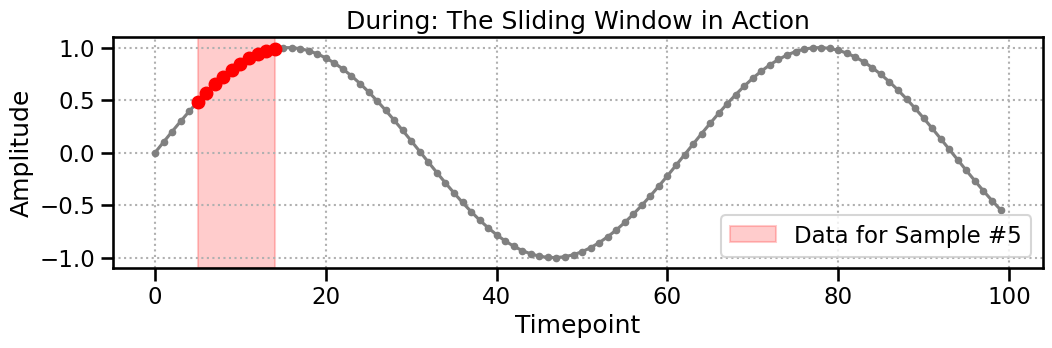

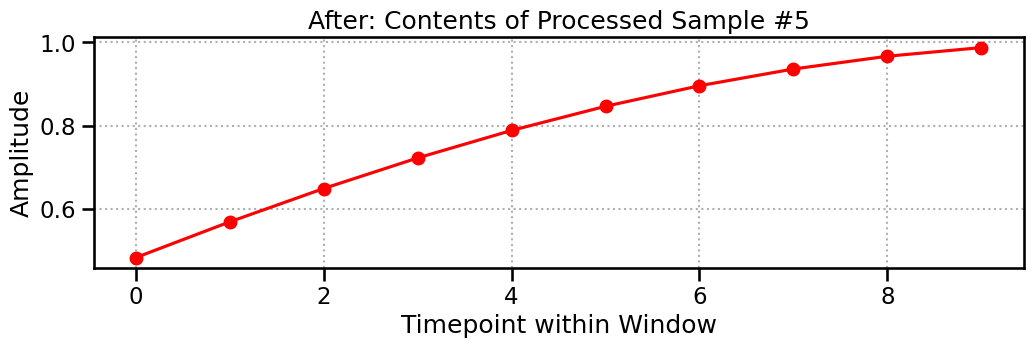

Processed data shape: torch.Size([91, 1, 10])


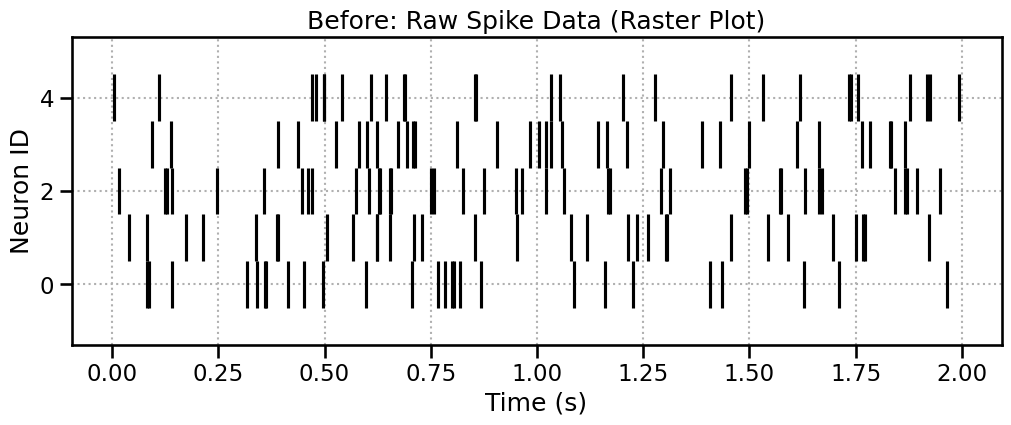

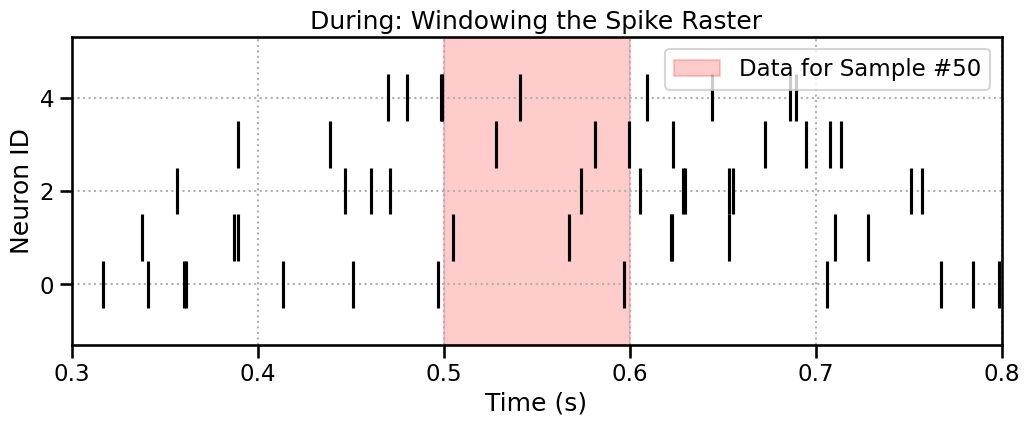

After: Contents of Processed Sample #50
---------------------------------------------------
Window Time: [0.50s, 0.60s]
Processed Tensor Shape: torch.Size([190, 5, 6])

Contents (Spike times relative to window start):
  Neuron 0: [0.093 0.    0.    0.    0.    0.   ]
  Neuron 1: [0.001 0.063 0.    0.    0.    0.   ]
  Neuron 2: [0.07 0.   0.   0.   0.   0.  ]
  Neuron 3: [0.024 0.077 0.095 0.    0.    0.   ]
  Neuron 4: [0.037 0.    0.    0.    0.    0.   ]


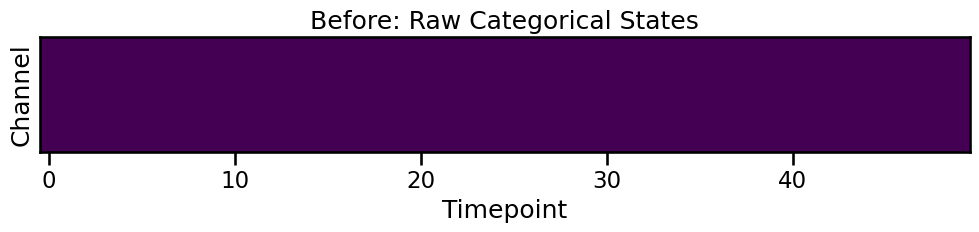

Raw data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...
Raw states for first window: [1 1 1]
Processed one-hot vector:    [0. 1. 0. 1. 0. 1.]

Final processed shape: torch.Size([48, 1, 6])


RuntimeError: shape '[3, 3]' is invalid for input of size 6

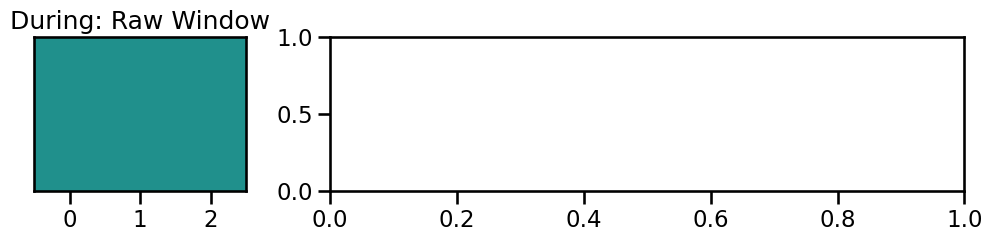

In [3]:
import numpy as np
import torch
import neural_mi as nmi
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

raw_continuous_data = np.sin(np.linspace(0, 10, 100)).reshape(1, 100)

plt.figure(figsize=(12, 3))
plt.plot(raw_continuous_data.T, marker='.')
plt.title("Before: Raw Continuous Signal")
plt.xlabel("Timepoint")
plt.ylabel("Amplitude")
plt.grid(True, linestyle=':')
plt.show()

print(f"Raw data shape: {raw_continuous_data.shape}")

window_size = 10
sample_idx_to_show = 5
start = sample_idx_to_show
end = start + window_size

plt.figure(figsize=(12, 3))
plt.plot(raw_continuous_data.T, color='gray', marker='.')
plt.plot(np.arange(start, end), raw_continuous_data.T[start:end], color='red', marker='o')
plt.axvspan(start, end - 1, color='red', alpha=0.2, label=f'Data for Sample #{sample_idx_to_show}')
plt.title("During: The Sliding Window in Action")
plt.xlabel("Timepoint")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

processor = nmi.data.ContinuousProcessor(window_size=window_size, step_size=1)
processed_data = processor.process(raw_continuous_data)

plt.figure(figsize=(12, 3))
plt.plot(processed_data[sample_idx_to_show, 0, :].numpy(), 'o-', color='red')
plt.title(f"After: Contents of Processed Sample #{sample_idx_to_show}")
plt.xlabel("Timepoint within Window")
plt.ylabel("Amplitude")
plt.grid(True, linestyle=':')
plt.show()

print(f"Processed data shape: {processed_data.shape}")

spike_data, _ = nmi.datasets.generate_correlated_spike_trains(
    n_neurons=5,
    duration=2.0, # Use a shorter duration for visualization
    firing_rate=15
)

plt.figure(figsize=(12, 4))
plt.eventplot(spike_data, color='black')
plt.title("Before: Raw Spike Data (Raster Plot)")
plt.xlabel("Time (s)")
plt.ylabel("Neuron ID")
plt.grid(True, linestyle=':')
plt.show()

window_size_s = 0.1 # 100 ms
step_size_s = 0.01  # 10 ms
sample_idx_to_show = 50

start_time = sample_idx_to_show * step_size_s
end_time = start_time + window_size_s

plt.figure(figsize=(12, 4))
plt.eventplot(spike_data, color='black')
plt.axvspan(start_time, end_time, color='red', alpha=0.2, label=f'Data for Sample #{sample_idx_to_show}')
plt.title("During: Windowing the Spike Raster")
plt.xlabel("Time (s)")
plt.ylabel("Neuron ID")
plt.xlim(start_time - window_size_s*2, end_time + window_size_s*2)
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

max_spikes = nmi.data.processors.find_max_spikes_per_window(spike_data, window_size_s)
spike_processor = nmi.data.SpikeProcessor(
    window_size=window_size_s, step_size=step_size_s, max_spikes_per_window=max_spikes
)
processed_spike_data = spike_processor.process(spike_data)

print(f"After: Contents of Processed Sample #{sample_idx_to_show}")
print("---------------------------------------------------")
print(f"Window Time: [{start_time:.2f}s, {end_time:.2f}s]")
print(f"Processed Tensor Shape: {processed_spike_data.shape}")
print("\nContents (Spike times relative to window start):")
for i in range(len(spike_data)):
    content = processed_spike_data[sample_idx_to_show, i, :].numpy()
    print(f"  Neuron {i}: {np.round(content, 3)}")

raw_cat_data, _ = nmi.datasets.generate_correlated_categorical_series(
    n_samples=50, n_channels=1, n_categories=3, use_torch=False
)

fig, ax = plt.subplots(figsize=(12, 1.5))
ax.imshow(raw_cat_data, aspect='auto', cmap='viridis', interpolation='nearest')
ax.set_title("Before: Raw Categorical States")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Channel")
ax.set_yticks([])
plt.show()
print(f"Raw data: {raw_cat_data[0, :20]}...")

cat_processor = nmi.data.CategoricalProcessor(window_size=3, step_size=1)
processed_cat_data = cat_processor.process(raw_cat_data)

first_window_raw = raw_cat_data[0, :3]
first_window_processed = processed_cat_data[0, 0, :]

print(f"Raw states for first window: {first_window_raw}")
print(f"Processed one-hot vector:    {first_window_processed.numpy()}")
print(f"\nFinal processed shape: {processed_cat_data.shape}")

# Visualize the one-hot encoding
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2), gridspec_kw={'width_ratios': [1, 3]})
ax1.imshow(first_window_raw.reshape(1, -1), cmap='viridis', aspect='auto', vmin=0, vmax=2)
ax1.set_title("During: Raw Window")
ax1.set_yticks([])

ax2.imshow(first_window_processed.reshape(3, 3), cmap='gray_r', aspect='auto')
ax2.set_title("After: One-Hot Encoded & Flattened Vector")
ax2.set_yticks([])
plt.show()

x_cont_raw = np.random.randn(2, 1000)
y_spike_raw, _ = nmi.datasets.generate_correlated_spike_trains(n_neurons=5, duration=10.0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax1.plot(np.linspace(0, 10, 1000), x_cont_raw.T)
ax1.set_title("Before: Raw Continuous Data (X)")
ax1.set_ylabel("Amplitude")
ax1.grid(True, linestyle=':')

ax2.eventplot(y_spike_raw, color='black')
ax2.set_title("Before: Raw Spike Data (Y)")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Neuron ID")
ax2.grid(True, linestyle=':')
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax1.plot(np.linspace(0, 10, 1000), x_cont_raw.T)
ax1.set_title("Before: Raw Continuous Data (X)")
ax1.set_ylabel("Amplitude")
ax1.grid(True, linestyle=':')

ax2.eventplot(y_spike_raw, color='black')
ax2.set_title("Before: Raw Spike Data (Y)")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Neuron ID")
ax2.grid(True, linestyle=':')
ax2.set_xlim(0,0.5)
plt.show()

handler = nmi.data.DataHandler(
    x_data=x_cont_raw, y_data=y_spike_raw,
    processor_type_x='continuous', processor_params_x={'window_size': 100, 'step_size': 10}, # -> 91 samples
    processor_type_y='spike', processor_params_y={'window_size': 0.5, 'step_size': 0.05}     # -> 191 samples
)

x_processed, y_processed = handler.process()

print("--- Theoretical vs. Actual Sample Counts ---")
print("Continuous theoretical samples: 91")
print("Spike theoretical samples: 191")
print("The library will align to the smaller count.\n")
print("--- Final Processed Shapes ---")
print(f"X (Continuous) shape: {x_processed.shape}")
print(f"Y (Spike) shape:      {y_processed.shape}")
print("\nThe number of samples (dim 0) is now identical!")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax1.plot(np.linspace(0, 0.5, 100), x_processed[0,:,:].T)
ax1.set_title("After: 1st Window of Continuous Data (X)")
ax1.set_ylabel("Amplitude")
ax1.grid(True, linestyle=':')

ax2.eventplot(y_processed[0,:,:], color='black')
ax2.set_title("After: 1st Window of Spike Data (Y)")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Neuron ID")
ax2.grid(True, linestyle=':')
ax2.set_xlim(left=0.001)
plt.tight_layout()
plt.show()

# Tutorial 3 (Finding Temporal Relationships)

In [6]:
import numpy as np
import neural_mi as nmi
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

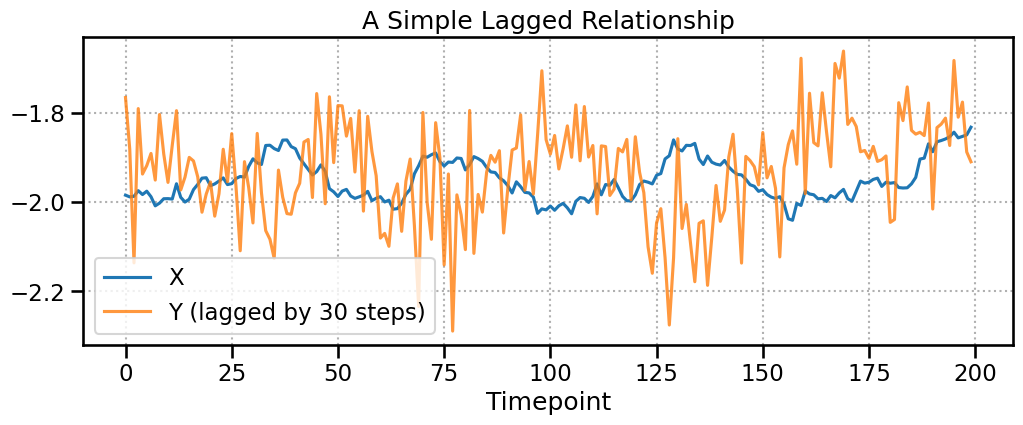

In [7]:
ground_truth_lag = 30
x_raw, y_raw = nmi.datasets.generate_temporally_convolved_data(
    n_samples=10000, lag=ground_truth_lag, noise=0.1
)

plt.figure(figsize=(12, 4))
plt.plot(x_raw[0, :200], label='X')
plt.plot(y_raw[0, :200], label=f'Y (lagged by {ground_truth_lag} steps)', alpha = 0.8)
plt.title("A Simple Lagged Relationship")
plt.xlabel("Timepoint")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

In [ ]:
base_params = {
    'n_epochs': 50, 'learning_rate': 1e-3, 'batch_size': 64,
    'patience': 20, 'embedding_dim': 16, 'hidden_dim': 128, 'n_layers': 2,
    'embedding_model': 'cnn',       # Use a CNN for temporal data
    # 'critic_type': 'bilinear'     # Use a powerful critic for a clear result
}

sweep_grid = {'window_size': [1, 10, 20, 30, 40, 60, 100],
             'run_id': range(5)}

window_results = nmi.run(
    x_data=x_raw, y_data=y_raw, mode='sweep',
    processor_type_x='continuous', processor_params_x={},
    base_params=base_params,
    sweep_grid=sweep_grid,
    n_workers=2,
    random_seed=42
)

2025-10-19 22:09:48 - neural_mi - WARNING - Reproducibility with random_seed is not guaranteed with n_workers > 1.
2025-10-19 22:09:48 - neural_mi - INFO - Detected sweep over processor or lag parameters. Deferring data processing to workers.
2025-10-19 22:09:48 - neural_mi - INFO - Starting parameter sweep with 2 workers...


Parameter Sweep Progress:   0%|          | 0/35 [00:00<?, ?task/s]

In [ ]:
ax = window_results.plot(show=False)
ax.axvline(x=ground_truth_lag, color='red', linestyle='--', label=f'True Lag({ground_truth_lag})')
ax.set_title("Finding Interaction Duration with a Window Sweep")
ax.set_xlabel("Window Size")
ax.legend()
ax.set_ylim(bottom=0)
plt.show()

best_run = window_results.dataframe.loc[window_results.dataframe['mi_mean'].idxmax()]
print(f"--- Best Result ---\nOptimal Window Size: {best_run['window_size']}")

In [ ]:
# For lag analysis, we need to fix the window size.
# We'll use the optimal one we just found.
processor_params = {'window_size': 40}

# We'll test a range of lags from -50 to +50.
lag_range = range(-50, 51, 10)

lag_results = nmi.run(
    x_data=x_raw,
    y_data=y_raw,
    mode='lag',
    processor_type_x='continuous',
    processor_params_x=processor_params,
    base_params=base_params,
    lag_range=lag_range,
    n_workers=2,
    random_seed=42
)

In [ ]:
ax = lag_results.plot(show=False)
ax.axvline(x=ground_truth_lag, color='red', linestyle='--', label=f'True Lag({ground_truth_lag})')
ax.set_title("Finding the Precise Offset with a Lag Analysis")
ax.set_xlabel("Lag (Timepoints)")
ax.legend()
ax.set_ylim(bottom=0)
plt.show()

# Tutorial 4: Choosing the Right Model and Estimator

In [5]:
import torch
import numpy as np
import neural_mi as nmi
import matplotlib.pyplot as plt
import seaborn as sns
from torch.nn import Sequential, Linear, Softplus
from torch.cuda.amp import autocast
import gc
import os

gc.collect()
torch.cuda.empty_cache()

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

sns.set_context("talk")

In [6]:
# 1. Create the shared latent variable Z
n_samples = 5000
z = torch.randn(n_samples, 2)

# 2. Create a 45-degree rotation matrix for Y's latent variable
angle = np.pi/4
rotation_matrix = torch.tensor([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]], dtype=torch.float32)
z_rotated = z @ rotation_matrix

# 3. Create nonlinear mappings from latent to a high-dimensional observed space
mlp = Sequential(Linear(2,64), Softplus(), Linear(64, 50))
x_raw = mlp(z).T.detach()
y_raw = mlp(z_rotated).T.detach()

In [7]:
# Now we sweep over the critic types to see which one can solve the task
sweep_grid_separable_bilinear = {
    'critic_type': ['separable', 'bilinear'],
    # 'critic_type': ['concat'],
    'run_id': range(5) # Average over 5 runs for stability
}

base_params = {
    'n_epochs': 100, 'learning_rate': 5e-4, 'batch_size': 64,
    'patience': 20, 'embedding_dim':8, 'hidden_dim': 64, 'n_layers': 3
}

critic_results_separable_bilinear = nmi.run(
    x_data=x_raw, y_data=y_raw,
    mode='sweep',
    processor_type_x='continuous',
    processor_params_x={'window_size': 1},
    base_params=base_params,
    sweep_grid=sweep_grid_separable_bilinear,
    n_workers=1,
    random_seed=42
)

2025-10-19 22:13:56 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Run d828e43b-124b-44b5-ab3e-9592c6adb57b_c0:   0%|          | 0/100 [00:00<?, ?it/s]

RuntimeError: File C:\Users\Rinta\AppData\Local\Temp\tmpxchk71qo.pt cannot be opened.

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=critic_results_separable_bilinear.dataframe, x='critic_type', y='mi_mean', capsize=0.1, order=['separable', 'bilinear', 'concat'])
plt.title('Critic Performance on the Rotated Manifold Task')
plt.ylabel('Estimated MI (bits)')
plt.xlabel('Critic Architecture')
plt.ylim(bottom=0)
plt.show()

In [ ]:
# Trying to get concat critic to not crash when I try running it
sweep_grid_concat = {
    'critic_type': ['concat'],
    'run_id': range(5) # Average over 5 runs for stability
}

base_params = {
    'n_epochs': 100, 'learning_rate': 5e-4, 'batch_size': 64,
    'patience': 20, 'embedding_dim':8, 'hidden_dim': 64, 'n_layers': 3
}

x_raw = x_raw.half()
y_raw = y_raw.half()

outputs = []
for i in range(0, len(x_raw), 128):
  out = nmi.run(
      x_data=x_raw[i:i+128], y_data=y_raw[i:i+128],
      mode='sweep',
      processor_type_x='continuous',
      processor_params_x={'window_size': 1},
      base_params=base_params,
      sweep_grid=sweep_grid_concat,
      n_workers=1,
      random_seed=42
  )
  outputs.append(out)

2025-10-15 01:23:57 - neural_mi - INFO - Starting parameter sweep sequentially (n_workers=1)...


INFO:neural_mi:Starting parameter sweep sequentially (n_workers=1)...


Sequential Sweep Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Run 5d2b0054-8037-47f5-aaac-c64edc41dba7_c0:   0%|          | 0/100 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.78 GiB. GPU 0 has a total capacity of 14.74 GiB of which 3.25 GiB is free. Process 91605 has 11.49 GiB memory in use. Of the allocated memory 11.34 GiB is allocated by PyTorch, and 13.33 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
ground_truth_mi = 8.0
batch_size = 128
infonce_limit_bits = np.log(batch_size) / np.log(2)

x_high_mi, y_high_mi = nmi.datasets.generate_correlated_gaussians(
    n_samples=10000, dim=20, mi=ground_truth_mi
)

# Use a powerful model to ensure the estimator is the limiting factor
high_mi_params = {
    'n_epochs': 100, 'learning_rate': 5e-4, 'batch_size': batch_size,
    'patience': 20, 'embedding_dim': 32, 'hidden_dim': 128, 'n_layers': 3
}

print("--- Running with InfoNCE (default) ---")
infonce_results = nmi.run(

)